<a href="https://colab.research.google.com/github/movindu-ayanaja/SE4050-DeepLearning-Lab1/blob/main/Task1_SE4050_IT22293558.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns

# Create a 4x4 array from exponential distribution
array = np.random.exponential(scale=1.0, size=(4, 4))
print(array)



[[1.49829464 1.38822656 0.21494501 3.84454802]
 [0.17995953 3.16509624 3.19141135 0.78727336]
 [2.36956845 0.56381174 0.5699547  0.17758424]
 [1.35204883 0.1745741  0.14760111 0.30795577]]


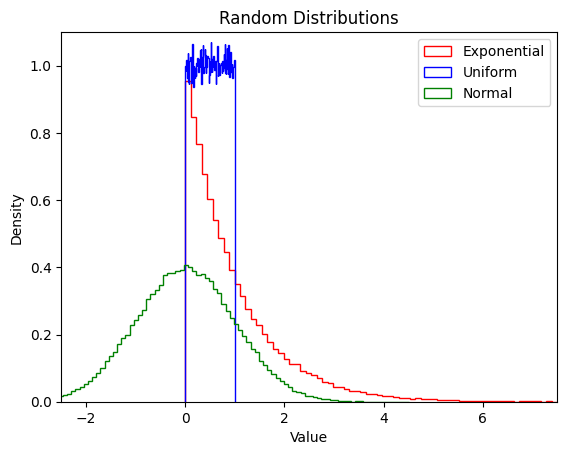

In [ ]:
import matplotlib.pyplot as plt

exp_data = np.random.exponential(scale=1.0, size=100000)
uniform_data = np.random.rand(100000)
normal_data = np.random.randn(100000)

plt.hist(exp_data, density=True, bins=100, histtype="step", color="red", label="Exponential")
plt.hist(uniform_data, density=True, bins=100, histtype="step", color="blue", label="Uniform")
plt.hist(normal_data, density=True, bins=100, histtype="step", color="green", label="Normal")

plt.axis([-2.5, 7.5, 0, 1.1])
plt.legend(loc="upper right")
plt.title("Random Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


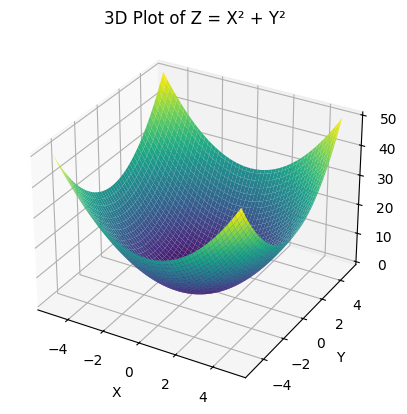

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("3D Plot of Z = X² + Y²")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


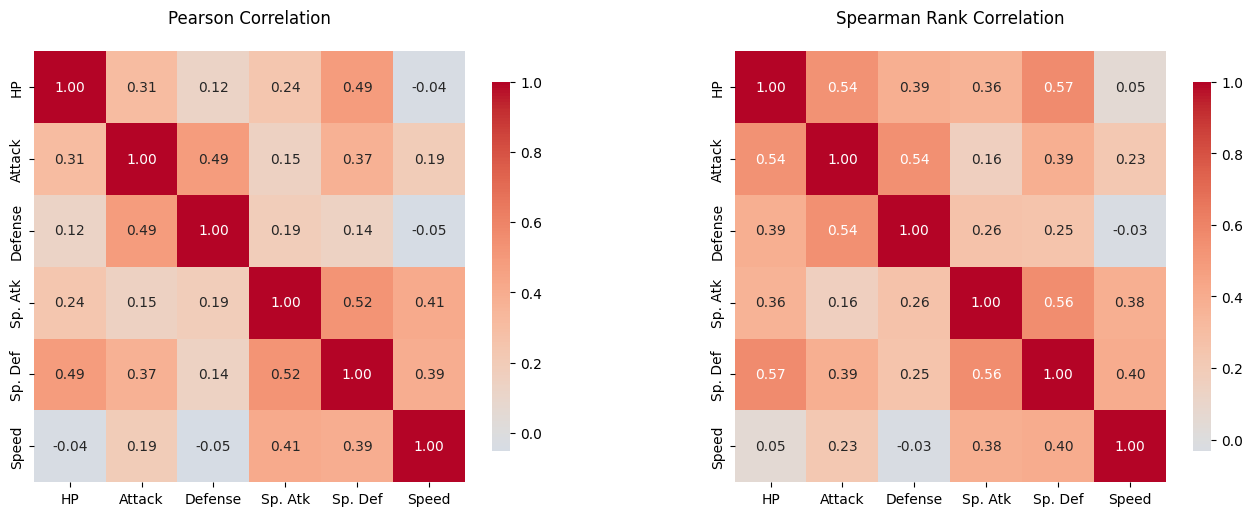


Top 3 Pearson Correlations:
HP       HP         1.000000
Sp. Def  Sp. Atk    0.522907
Attack   Defense    0.491965
Sp. Def  HP         0.490978
dtype: float64

Top 3 Spearman Correlations:
HP       HP         1.000000
         Sp. Def    0.566837
Sp. Atk  Sp. Def    0.561665
Defense  Attack     0.541506
dtype: float64


In [11]:
# Load Pokémon dataset from CSV (alternative source)
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

# Select and clean the features of interest
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df_stats = df[features].dropna()

# Calculate correlations
pearson_corr = df_stats.corr(method='pearson')
spearman_corr = df_stats.corr(method='spearman')

# Create subplots
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.3)

# Pearson heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})
plt.title('Pearson Correlation', pad=20)

# Spearman heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})
plt.title('Spearman Rank Correlation', pad=20)

plt.show()

# Print strongest correlations
print("\nTop 3 Pearson Correlations:")
print(pearson_corr.unstack().sort_values(ascending=False).drop_duplicates().head(4))

print("\nTop 3 Spearman Correlations:")
print(spearman_corr.unstack().sort_values(ascending=False).drop_duplicates().head(4))
